[[  7.47093803  15.73492051   8.58150875]
 [  8.2072856   15.84256381   6.95853057]
 [  8.30145467  16.48991049   7.96247303]
 ...
 [ -2.56876117  34.73369193 -11.50608317]
 [ -2.88030668  34.08458544 -11.59922906]
 [ -7.47290976  32.85067658 -11.90299847]]


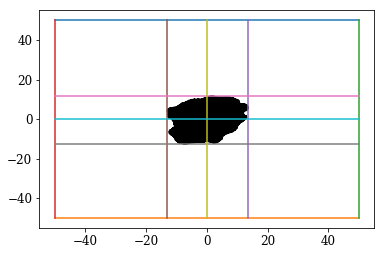

In [5]:
#mover proteina lejos o cerca de la superficie
########################################################
#abrir archivo donde proteina esta centrada en el sensor archivo.vert
import numpy
#file=open('1PGB_mut_p1.5_d02_0_0_2.vert','r') #caso original (x=0,h=2,z=0)
file=open('1PGB_mut_p1.5_d02_0_0_2_rot200_tilt10.vert','r')
#posicion_inicial de Centro geometrico proteina respecto sensor (x=0,z=0,y=?) h=2 --- distancia entre proteina y sensor

X=numpy.loadtxt(file)
print(X[:,0:3])

import matplotlib.pyplot as plt
%matplotlib inline

#sensor rectangular

cx0=numpy.zeros(100) #vista z-x
cz0=numpy.zeros(100)
x=numpy.zeros(100)
z=numpy.zeros(100)
x_0=numpy.zeros(100)
z_0=numpy.zeros(100)
y=numpy.zeros(100)
y_0=numpy.zeros(100)
y_1=numpy.zeros(100)
y_2=numpy.zeros(100)
cxmax=numpy.zeros(100)
cxmin=numpy.zeros(100)
czmax=numpy.zeros(100)
czmin=numpy.zeros(100)
czmid=numpy.zeros(100)
cxmid=numpy.zeros(100)

for i in range(len(x)):
    x[i]=50
    z[i]=50
    x_0[i]=-50
    z_0[i]=-50
    y[i]=50
    y_0[i]=-50
    y_1[i]=0
    y_2[i]=-10
    cxmax[i]=max(X[:,0])
    cxmin[i]=min(X[:,0])
    czmax[i]=max(X[:,2])
    czmin[i]=min(X[:,2])
    cxmid[i]=0
    czmid[i]=0
x1=numpy.linspace(-50,50,100) #vista y-x
z1=numpy.linspace(-50,50,100)
y1=numpy.linspace(-10,0,100)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.plot(X[:,0], X[:,2], color='k', lw=2)
plt.plot(x1,z,x1,z_0)
plt.plot(x,z1,x_0,z1)
plt.plot(cxmax,z1,cxmin,z1)
plt.plot(x1,czmax,x1,czmin)
plt.plot(cxmid,z1)
plt.plot(x1,czmid)





5.0


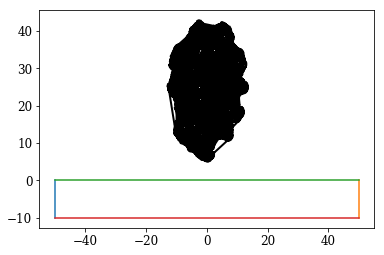

In [7]:
plt.plot(X[:,0], X[:,1], color='k', lw=2)
plt.plot(y_0,y1,y,y1)
plt.plot(x1,y_1,x1,y_2)

print(min(X[:,1]))

In [28]:
#Mover proteina respecto de la superficie
Xc=numpy.copy(X)
coor_x=5
coor_y=0
coor_z=5

Xc[:,0] -=coor_x
Xc[:,2] -=coor_z
Xc[:,1] +=coor_y

print(Xc[:,0:3])

[[-20.4735  14.522   -8.927 ]
 [-19.8125  12.876   -8.723 ]
 [-20.2835  13.685   -7.975 ]
 ..., 
 [  6.8085  10.172    1.174 ]
 [  6.8085  10.172    0.448 ]
 [  9.4135  12.668   -2.665 ]]


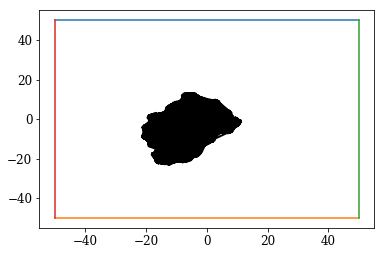

In [29]:
#sensor rectangular

cx0=numpy.zeros(100) #vista z-x
cz0=numpy.zeros(100)
x=numpy.zeros(100)
z=numpy.zeros(100)
x_0=numpy.zeros(100)
z_0=numpy.zeros(100)
y=numpy.zeros(100)
y_0=numpy.zeros(100)
y_1=numpy.zeros(100)
y_2=numpy.zeros(100)
cxmax=numpy.zeros(100)
cxmin=numpy.zeros(100)
czmax=numpy.zeros(100)
czmin=numpy.zeros(100)
czmid=numpy.zeros(100)
cxmid=numpy.zeros(100)

for i in range(len(x)):
    x[i]=50
    z[i]=50
    x_0[i]=-50
    z_0[i]=-50
    y[i]=50
    y_0[i]=-50
    y_1[i]=0
    y_2[i]=-10

    
x1=numpy.linspace(-50,50,100) #vista y-x
z1=numpy.linspace(-50,50,100)
y1=numpy.linspace(-10,0,100)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.plot(Xc[:,0], Xc[:,2], color='k', lw=2)
plt.plot(x1,z,x1,z_0)
plt.plot(x,z1,x_0,z1)



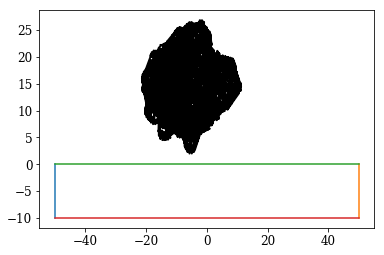

In [30]:
plt.plot(Xc[:,0], Xc[:,1], color='k', lw=2)
plt.plot(y_0,y1,y,y1)
plt.plot(x1,y_1,x1,y_2)

In [31]:
file2=open('1PGB_mut_p1.5_d02_'+str(coor_x)+'_'+str(coor_z)+'_'+str(coor_y + 2)+'.vert','w')
for i in range(len(X[:,1])):
    x=Xc[i,:]
    linea = '{0} {1} {2} {3} {4} {5} {6} {7} {8}\n'.format(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8])
    file2.write(linea)
file2.close()
file.close()

In [32]:
#########################################################################################################

In [33]:
#mover atomos_archivo.pqr

file3=open('1PGB_mut_0_0_2.pqr','r')
file4=open('xyz_PGB_pqr.txt','w')
for line in file3:
    line_2=line.split()
    if line_2[0]=='ATOM':
        linea='{0} {1} {2}\n'.format(line_2[5],line_2[6],line_2[7])
        file4.write(linea)
file4.close()
file3.close()

file5=open("xyz_PGB_pqr.txt",'r')
Y=numpy.loadtxt(file5)
Yc=numpy.copy(Y)
Yc[:,0] -= coor_x #coordenadax
Yc[:,1] += coor_y #coordenaday
Yc[:,2] -= coor_z #coordenadaz

file6=open("1PGB_mut_0_0_2.pqr",'r')
file7=open('1PGB_mut_'+str(coor_x)+'_'+str(coor_z)+'_'+str(coor_y + 2)+'.pqr','w')

contador=0
for line_4 in file6:
    line_5=line.split()
    
    if line_5[0]=='ATOM':
        contador += 1
        xx=Yc[contador - 1,:]
        x=line_5
        linea = '{0} {1} {2} {3} {4} {5} {6} {7} {8} {9}\n'.format(x[0],x[1],x[2],x[3],x[4],xx[0],xx[1],xx[2],x[8],x[9])
        file7.write(linea)
        
file7.close()
file6.close()
file5.close()

In [34]:
###########################################################################################################################

In [38]:
#mover superficie sensor a una distancia R ----> inf donde R es la distancia entre los centros de la superficie y la 
#proteina.

file8=open('sensor_100x10x100_d02.vert','r')
file9=open('sensor_100x10x100_d02_-4e-5-4e-5-4e-5-4e-5-4e-5-4e-5.phi0','r')
file9.close()
file10=open('sensor_100x10x100_d02_isolated.vert','w')

K=numpy.loadtxt(file8)
print(K)

[[ 50. -10. -50.]
 [ 50. -10. -49.]
 [ 50. -10. -48.]
 ..., 
 [ 50.  -2. -50.]
 [ 50.  -1. -50.]
 [ 50.   0. -50.]]


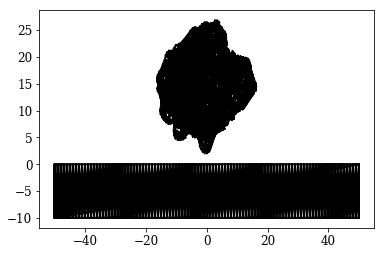

In [48]:
plt.plot(K[:,0], K[:,1], color='k', lw=2)
plt.plot(X[:,0], X[:,1], color='k', lw=2)

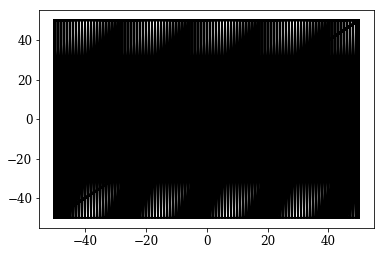

In [40]:
plt.plot(K[:,0], K[:,2], color='k', lw=2)

In [42]:
inf_x=100000
inf_y=100000
inf_z=100000

Kc=numpy.copy(K)
print(Kc)
Kc[:,0] +=inf_x
Kc[:,1] +=inf_y
Kc[:,2] +=inf_z
print(Kc)

[[ 50. -10. -50.]
 [ 50. -10. -49.]
 [ 50. -10. -48.]
 ..., 
 [ 50.  -2. -50.]
 [ 50.  -1. -50.]
 [ 50.   0. -50.]]
[[ 100050.   99990.   99950.]
 [ 100050.   99990.   99951.]
 [ 100050.   99990.   99952.]
 ..., 
 [ 100050.   99998.   99950.]
 [ 100050.   99999.   99950.]
 [ 100050.  100000.   99950.]]


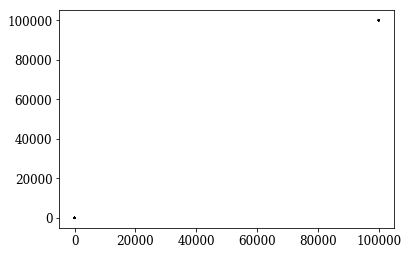

In [49]:
plt.plot(Kc[:,0], Kc[:,1], color='k', lw=2)
plt.plot(Xc[:,0], Xc[:,1], color='k', lw=2)

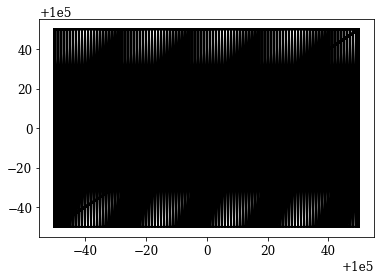

In [51]:
plt.plot(Kc[:,0], Kc[:,2], color='k', lw=2)

In [52]:
for i in range(len(K[:,1])):
    k=Kc[i,:]
    linea = '{0} {1} {2}\n'.format(k[0],k[1],k[2])
    file10.write(linea)
file10.close()